# **딥러닝 중간고사 - 1~6번**

#### **2025-05-07**

#### **202014107 통계학과 강신성**

---

<a href="https://colab.research.google.com/github/guebin/DL2025/blob/main/posts/mid.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

In [4]:
import torch
import torchvision

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import PIL

import requests
import io

# `1`. 기본문법  -- 10점

`(1)`  아래는 각각 horizontal edge, vertical edge를 의미하는 2개의 컨볼루션 필터를 설계한 것이다. 

In [5]:
h_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=4,
    bias=False
)
h_conv.weight.data = torch.tensor([[[
    [ 0, 0, 0, 0],
    [ 0, -1.0, -1.0, 0],
    [0, 1.0, 1.0, 0],
    [ 0, 0, 0, 0]
]]])
v_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=4,
    bias=False
)
v_conv.weight.data = torch.tensor([[[
    [ 0, 0, 0, 0],
    [ 0, 1.0, -1.0, 0],
    [0, 1.0, -1.0, 0],
    [ 0, 0, 0, 0]
]]])

위의 계수값을 활용하여 `in_channels=1`, `out_channels=2`, `kernel_size=4` 인 새로은 convolution filter를 설계하고 첫번째 아웃풋채널은 horizontal edge 을 두번째 아웃풋 채널은 vertical edge을 의미하도록 하라. 

**hint:**

- `torch.concat`을 활용해야합니다. 
- 07wk-2강의노트를 참고하세요 

In [6]:
net = torch.nn.Conv2d(1, 2, kernel_size = 4, bias = False)

net.weight.data = torch.concat([h_conv.weight.data, v_conv.weight.data], axis = 0)

`(2)` 아래는 10장의 (28,28) 칼라이미지를 나타내는 자료이다. 

In [10]:
X = torch.rand(10,3,28,28)

따라서 이미지의 각 pixel에는 3개의 숫자가 존재한다. 아래의 선형변한을 수행하여 이미지의 각 pixel에 적용하여 3개의 숫자를 하나로 줄이는 코드를 작성하라. 

In [11]:
linr = torch.nn.Linear(3,1,bias=False)

**hint**: 

- 변환후의 차원은 (10,1,28,28) 이어야 합니다. 
- `torch.einsum`을 활용해야합니다.
- 08wk-2강의노트를 참고하세요 

In [13]:
torch.einsum("ochw, kc -> okhw", X, linr.weight)

tensor([[[[ 0.0031,  0.0544,  0.2055,  ...,  0.4220,  0.2388,  0.2850],
          [ 0.0019,  0.0559,  0.1627,  ...,  0.0846,  0.0260,  0.1426],
          [ 0.0772,  0.1751,  0.2858,  ...,  0.0121,  0.2670,  0.2883],
          ...,
          [ 0.1878,  0.4116,  0.1877,  ...,  0.1606,  0.3126,  0.0378],
          [ 0.0746,  0.1543,  0.0759,  ...,  0.1870,  0.4829,  0.1303],
          [-0.0156,  0.0103,  0.3517,  ...,  0.2981,  0.0447,  0.1825]]],


        [[[ 0.0613,  0.1396,  0.2377,  ..., -0.0041,  0.4221,  0.0777],
          [ 0.1279,  0.2887,  0.0999,  ...,  0.1475,  0.0742,  0.1077],
          [ 0.2178,  0.1614,  0.2706,  ...,  0.0306,  0.0465,  0.3410],
          ...,
          [ 0.2142,  0.0985,  0.2318,  ...,  0.4392,  0.4004,  0.1828],
          [ 0.0941,  0.1279,  0.2208,  ...,  0.3960,  0.2535,  0.3094],
          [ 0.1126,  0.1838, -0.0984,  ...,  0.3901,  0.4201,  0.3123]]],


        [[[ 0.2540,  0.4262,  0.1737,  ...,  0.0983,  0.2170,  0.0558],
          [ 0.1544,  0.099

# `2`. 파라메터 count -- 10점

**note:** 

1. 학습가능한 파라메터가 동일할 경우 동일하다고 답할것. 
2. 해설쓸 필요 없이 답만 쓸 것 

`(1)` net1과 net2중 학습가능한 파라메터가 더 많은 쪽은 어디인가? 

In [15]:
net1 = torch.nn.Sequential(
    torch.nn.Linear(10,1, bias=False),
    torch.nn.Sigmoid()
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(10,1, bias=True)
)

In [16]:
sum([torch.prod(torch.tensor(l.shape)) for l in net1.parameters()]).item()

10

In [17]:
sum([torch.prod(torch.tensor(l.shape)) for l in net2.parameters()]).item()

11

> net2

`(2)` net1과 net2중 학습가능한 파라메터가 더 많은 쪽은 어디인가? 

In [18]:
net1 = torch.nn.Sequential(
    torch.nn.Linear(10,5),
    torch.nn.Dropout(0.5),
    torch.nn.ReLU(),
    torch.nn.Linear(5,1)
    
)
net2 = torch.nn.Sequential(
    torch.nn.Linear(10,5),
    torch.nn.ReLU(),
    torch.nn.Linear(5,1)
)

In [19]:
sum([torch.prod(torch.tensor(l.shape)) for l in net1.parameters()]).item()

61

In [20]:
sum([torch.prod(torch.tensor(l.shape)) for l in net2.parameters()]).item()

61

> 둘다 학습 가능한 파라메터 수는 동일

`(3)` conv1과 conv2중 학습가능한 파라메터가 더 많은 쪽은 어디인가? 

In [44]:
conv1 = torch.nn.Conv2d(
    in_channels=1, 
    out_channels=1, 
    kernel_size=3
)
conv2 = torch.nn.Conv2d(
    in_channels=1, 
    out_channels=1, 
    kernel_size=5
)

> conv2

`(4)` conv1과 conv2중 학습가능한 파라메터가 더 많은 쪽은 어디인가? 

In [21]:
conv1 = torch.nn.Conv2d(
    in_channels=1, 
    out_channels=2, 
    kernel_size=3
)
conv2 = torch.nn.Conv2d(
    in_channels=1, 
    out_channels=1, 
    kernel_size=3
)

> conv1

`(5)` conv1과 conv2중 학습가능한 파라메터가 더 많은 쪽은 어디인가? 

In [23]:
conv1 = torch.nn.Conv2d(
    in_channels=1, 
    out_channels=2, 
    kernel_size=3,
    stride=1
)
conv2 = torch.nn.Conv2d(
    in_channels=1, 
    out_channels=2, 
    kernel_size=3,
    stride=2
)

In [24]:
sum([torch.prod(torch.tensor(l.shape)) for l in conv1.parameters()]).item()

20

In [25]:
sum([torch.prod(torch.tensor(l.shape)) for l in conv2.parameters()]).item()

20

> 둘다 동일

# `3`. 최적화 -- 20점

In [28]:
torch.manual_seed(43052)
dist = torch.distributions.Exponential(1/2)
x = dist.sample((10000,1))

주어진 자료 $x_i$에 대하여 함수 $l(\lambda)$를 최대화하는 $\lambda$를 경사하강법 기반의 알고리즘을 이용하여 추정하라. 단 이때 $\lambda$의 초기 추정값은 1로 설정하라. 

$$
l(\lambda) =\frac{1}{n} \sum_{i=1}^{n}\log f(x_i), \quad f(x_i) = \frac{1}{\lambda} e^{-\frac{x_i}{\lambda}}, \quad x_i \geq 0
$$

**hint** 

- $l(\lambda)$를 최대화하는 $\lambda$는 $-l(\lambda)$를 최소화합니다. 
- 이론적으로는 $l(\lambda)$를 최대화하는 $\lambda$는 `x.mean()`입니다. 즉 제대로 $\lambda$를 추정한다면 `x.mean()`이 나오도록 되어있습니다. 
- 저는 경사하강법을 이용했고 학습률은 0.05로 설정했습니다. 1000회 update하니까 잘 수렴했습니다.

In [30]:
def neg_l(lam) :
    """
    가능도는 최대화해야 하므로, 최적화를 위해서 음수로 바꿔줌
    """
    fx = (1/lam) * torch.exp(-x / lam)
    return -torch.mean(torch.log(fx))

lhat = torch.tensor([1.0], requires_grad = True)

for epoc in range(300) :
    l = neg_l(lhat)
    l.backward()
    lhat.data -= 0.1*lhat.grad
    lhat.grad = None

print(f"추정된 lambda = {lhat.data[0]:.4f}")

추정된 lambda = 1.9872


In [32]:
x.mean()

tensor(1.9874)

# `4`. 회귀 -- 20점

자유 낙하 운동이란 어떤 물체가 일정한 높이에서 떨어져 지면에 도달하기 까지 걸리는 시간을 다루는 물리학 개념이다.  다음은 물리학의 자유 낙하 운동에서 착안하여 생성한 데이터이다.

In [35]:
h = torch.rand(100)*100
h,_ = h.sort()
h = h.reshape(100,1)
t = torch.sqrt(2*h/9.8) + torch.randn([100,1])*0.1

여기에서 $h$는 낙하전의 높이(단위: m), $t$는 해당높이에서 물치가 지면에 도달하기 까지 걸리는 시간(단위:초)을 의미한다. 예를 들어 아래의 자료는 $h=97.7798, t=4.4356$를 의미하는데 

In [36]:
h[-1], t[-1]

(tensor([97.7798]), tensor([4.4356]))

이것은 높이 $97.7798$m에서 낙하한 물체가 약 $4.4356$초만에 지면에 도달했음을 의미한다. 아래의 그림은 $x$축에 $h$, $y$축에 $t$를 두고 해당 데이터를 산점도로 시각화 한 것이다. 

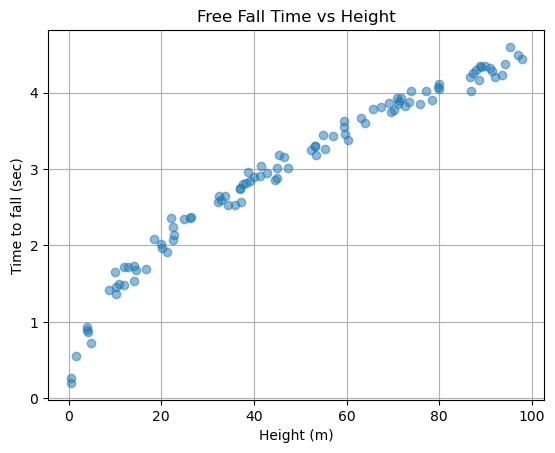

In [37]:
plt.plot(h,t,'o',alpha=0.5)
plt.xlabel('Height (m)')
plt.ylabel('Time to fall (sec)')
plt.title('Free Fall Time vs Height')
plt.grid(True)
plt.show()

그래프를 보면 높이가 높을 수록 낙하시간도 길어지는 경향이 관찰된다. 다만 동일한 높이라 하더라도 낙하시간이 조금씩 차이나는 경우가 있는데, 이는 사람이 시간측정을 수동으로 하며 발생하는 실험오차 때문이다. 이러한 오차에도 불구하고 $h$와 $t$사이에는 일정한 규칙이 존재하는듯 하다. 물리학과 교수님께 자문을 요청한 결과 자유낙하에 걸리는 시간은 $\sqrt{h}$에 비례함을 알 수 있었고 이를 근거로 아래와 같은 모형을 설계하였다. 

$$t_i = \beta_0 + \beta_1 \sqrt{h_i}+\epsilon_i, \quad \epsilon_i \sim {\cal N}(0,\sigma^2)$$

위의 모형을 활용하여 높이 $h$로부터 낙하시간 $t$를 예측하는 신경망 모델을 설계하고 학습하라. 학습한 신경망 모델을 활용하여 높이 40m,60m,80m 에서 물체를 자유낙하 시켰을때 지면에 도달하기까지 걸리는 시간을 각각 예측하라. 

**hint**

- $y_i = t_i$ 로 생각하시고 $x_i= \sqrt{h}_i$로 생각하시면 그냥 회귀모형이죠? 
- 답은 $2.8571$초, $3.4493$초, $4.0406$초 근처로 나오면 됩니다.
- 제시된 모형($t_i = \beta_0 + \beta_1 \sqrt{h_i}+\epsilon_i$)을 무시하고 04wk-2와 같은 방식으로 신경망을 설계하고 푸셔도 만점으로 인정합니다. 

In [40]:
x = h**0.5
y = t

net = torch.nn.Linear(1, 1)

loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters(), lr = 0.1)

##---##
for epoc in range(1000) :
    yhat = net(x)

    loss = loss_fn(yhat, y)
    loss.backward()

    optimizr.step()
    optimizr.zero_grad()

In [44]:
xx = torch.tensor([[40.0],
                   [60.0],
                   [80.0]])**0.5

In [49]:
result = net(xx)

print(f"h = 40 : {result[0].item():.4f}\nh = 60 : {result[1].item():.4f}\nh = 80 : {result[2].item():.4f}")

h = 40 : 2.8597
h = 60 : 3.5096
h = 80 : 4.0575


# `5`. 분류 -- 10점

> 모든 문항을 맞출경우만 10점으로 인정 

아래의 자료를 고려하자. 

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2025/main/posts/iris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


위의 자료는 아이리스 데이터셋으로 머신러닝에서 자주 사용되는 분류(classification) 예제 데이터이다. 데이터는 다음과 같은 특징을 가지고 있다:

**샘플 수: 150개**

**특징 수: 4개**

- 꽃받침 길이 (sepal length)
- 꽃받침 너비 (sepal width)
- 꽃잎 길이 (petal length)
- 꽃잎 너비 (petal width)

**클래스 수: 3개 (각 50개 샘플)**

- 0: setosa
- 1: versicolor
- 2: virginica

`(1)` 주어진 데이터를 8:2 비율로 학습용(df_train)과 테스트용(df_test)으로 나누고,  SepalLength, SepalWidth, PetalLength, PetalWidth를 입력으로 하여 Species를 예측할 수 있도록 데이터를 텐서 형태로 변환하라.

hint: 아래의 코드를 활용할 것 

```Python
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)
#---#
X = torch.tensor(df_train.iloc[:,:4].values).float()
y = ???
XX = ???
yy = ???
```

In [53]:
df_train = df.sample(frac=0.8, random_state=42)
df_test = df.drop(df_train.index)
#---#
X = torch.tensor(df_train.iloc[:,:4].values).float()
y = torch.tensor(df_train.iloc[:, 4].values).long()
XX = torch.tensor(df_test.iloc[:,:4].values).float()
yy = torch.tensor(df_test.iloc[:, 4].values).long()

`(2)`  아래의 제약사항에 맞추어 Species를 예측할 수 있는 적당한 네트워크를 학습하라.

**제약사항** 

- 학습 후 test accuracy 가 70% 이상일것
-  매 epoch마다 loss와 train accuracy를 출력할 것  

> 시험시간에 학습할 필요 없이, 기존에 공부했던 코드를 그대로 결과로 제시해도 무방함. 

`(풀이)`

In [110]:
ds_train = torch.utils.data.TensorDataset(X, y)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size = 50, shuffle = True)

ds_test = torch.utils.data.TensorDataset(XX, yy)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size = 30)

In [114]:
net = torch.nn.Sequential(
    torch.nn.Linear(4, 64),
    torch.nn.ReLU(),
    torch.nn.Dropout(),
    torch.nn.Linear(64, 3)
).to("cuda:0")

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters(), lr = 0.1)

##---##
for epoc in range(30) :
    net.train()
    
    for Xm, ym in dl_train :
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        netout = net(Xm)

        loss = loss_fn(netout, ym)
        loss.backward()
    
        optimizr.step()
        optimizr.zero_grad()

    net.eval()
    
    s = 0
    
    for Xm, ym in dl_train :
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")

        s += ((net(Xm).argmax(axis = 1)) == ym).sum()

    train_acc = s/len(X)
    print(f"epoch : {epoc},\tloss = {loss:.4f}\ttrain_acc = {train_acc:.4f}")

epoch : 0,	loss = 4.8009	train_acc = 0.6417
epoch : 1,	loss = 0.8076	train_acc = 0.6833
epoch : 2,	loss = 0.5895	train_acc = 0.6750
epoch : 3,	loss = 0.7373	train_acc = 0.6833
epoch : 4,	loss = 0.6054	train_acc = 0.6833
epoch : 5,	loss = 0.4740	train_acc = 0.7167
epoch : 6,	loss = 0.6598	train_acc = 0.8417
epoch : 7,	loss = 0.5589	train_acc = 0.9583
epoch : 8,	loss = 0.5419	train_acc = 0.8333
epoch : 9,	loss = 0.5545	train_acc = 0.9500
epoch : 10,	loss = 0.4567	train_acc = 0.9250
epoch : 11,	loss = 0.3631	train_acc = 0.8667
epoch : 12,	loss = 0.3139	train_acc = 0.7667
epoch : 13,	loss = 0.4084	train_acc = 0.9583
epoch : 14,	loss = 0.4435	train_acc = 0.9583
epoch : 15,	loss = 0.4534	train_acc = 0.9583
epoch : 16,	loss = 0.3646	train_acc = 0.8833
epoch : 17,	loss = 0.3546	train_acc = 0.9417
epoch : 18,	loss = 0.4762	train_acc = 0.9667
epoch : 19,	loss = 0.4475	train_acc = 0.9833
epoch : 20,	loss = 0.3228	train_acc = 0.9167
epoch : 21,	loss = 0.4942	train_acc = 0.9667
epoch : 22,	loss = 0

In [115]:
net.eval()
s = 0

for Xm, ym in dl_test :
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")

    s += (net(Xm).argmax(axis = 1) == ym).sum()

test_acc = s/len(XX)

print(f"test_acc = {test_acc:.4f}")

test_acc = 1.0000


# `6`. CNN -- 20점

아래는 FashionMNIST 데이터셋을 불러와 torch tensor로 변환하는 코드이다. 

In [2]:
df_train=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_train.csv')
df_test=pd.read_csv('https://media.githubusercontent.com/media/guebin/PP2023/main/posts/fashion-mnist_test.csv')
X = torch.tensor(df_train.iloc[:, 1:].to_numpy().reshape(-1, 1, 28, 28),dtype=torch.float32)
XX = torch.tensor(df_test.iloc[:, 1:].to_numpy().reshape(-1, 1, 28, 28),dtype=torch.float32)
y = torch.tensor(df_train['label'].to_numpy(), dtype=torch.long)
yy = torch.tensor(df_test['label'].to_numpy(), dtype=torch.long)

여기에서 `X`, `y`는 학습 데이터와 라벨, `XX`, `yy`는 테스트 데이터와 라벨을 의미한다. 아래의 제약사항에 맞추어 이 데이터를 학습할 수 있는 적당한 네트워크를 학습하라. 

**제약사항** 

- 학습 후 test accuracy 가 70% 이상일것
-  매 epoch마다 loss와 train accuracy를 출력할 것
-  네트워크에 `torch.nn.Conv2d`를 반드시 포함시킬 것 

In [13]:
len(y.unique())

10

In [6]:
ds_train = torch.utils.data.TensorDataset(X, y)
dl_train = torch.utils.data.DataLoader(ds_train, batch_size = 1024, shuffle = True)

ds_test = torch.utils.data.TensorDataset(XX, yy)
dl_test = torch.utils.data.DataLoader(ds_test, batch_size = 1024)

In [17]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(1, 64, kernel_size = 5, padding = 2),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.25),
    torch.nn.MaxPool2d(kernel_size = 3, padding = 1),
    torch.nn.Conv2d(64, 64, kernel_size = 3, padding = 1),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.25),
    torch.nn.MaxPool2d(kernel_size = 3, padding = 1),
    
    torch.nn.Flatten(),
    torch.nn.Linear(1024, 10)
).to("cuda:0")

loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(net.parameters())

In [18]:
##---##
for epoc in range(100) :
    net.train()

    for Xm, ym in dl_train :
        Xm = Xm.to("cuda:0")
        ym = ym.to("cuda:0")
        netout = net(Xm)

        loss = loss_fn(netout, ym)
        loss.backward()
    
        optimizr.step()
        optimizr.zero_grad()

    ## evaluation
    if epoc % 10 == 0 :
        net.eval()
    
        s = 0
        
        for Xm, ym in dl_train :
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")
    
            s += ((net(Xm).argmax(axis = 1)) == ym).sum()
    
        train_acc = s/len(X)


        s = 0
        
        for Xm, ym in dl_test :
            Xm = Xm.to("cuda:0")
            ym = ym.to("cuda:0")
    
            s += ((net(Xm).argmax(axis = 1)) == ym).sum()
    
        test_acc = s/len(XX)
        print(f"epoch : {epoc},\ttrain_acc = {train_acc:.4f},\ttest_acc = {test_acc:.4f}")

epoch : 0,	train_acc = 0.7600,	test_acc = 0.7536
epoch : 10,	train_acc = 0.8849,	test_acc = 0.8799
epoch : 20,	train_acc = 0.9038,	test_acc = 0.8916
epoch : 30,	train_acc = 0.9193,	test_acc = 0.9049
epoch : 40,	train_acc = 0.9193,	test_acc = 0.9049
epoch : 50,	train_acc = 0.9245,	test_acc = 0.9051
epoch : 60,	train_acc = 0.9255,	test_acc = 0.9098
epoch : 70,	train_acc = 0.9399,	test_acc = 0.9183
epoch : 80,	train_acc = 0.9434,	test_acc = 0.9179
epoch : 90,	train_acc = 0.9474,	test_acc = 0.9186


In [20]:
## 최종 평가
s = 0

for Xm, ym in dl_test :
    Xm = Xm.to("cuda:0")
    ym = ym.to("cuda:0")

    s += ((net(Xm).argmax(axis = 1)) == ym).sum()

test_acc = s/len(XX)
print(f"최종 test accuracy = {test_acc:.4f}")

최종 test accuracy = 0.9049


---

7, 8번 문제 풀이는 다른 파일에 있습니다.